## Project Objective

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cutresistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising. 

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. 

To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. 

The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. 

The results of the tests, with distances measured to the nearest yard, are contained in the data set “Golf”. 

Prepare a Managerial Report

1. Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls

2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

3. Do you see a need for larger sample sizes and more testing with the golf balls? Discuss.

In [22]:
#Two sample t test to validate hypothesis - Whether the 2 variables are significantly different or not

#Null Hypothesis - The 2 variables are not significantly different or the means are same
#Alternate Hypothesis - The 2 variables are significantly different or the means are statistically different

#Import the necessary packages
import numpy as np
from scipy.stats import ttest_ind, levene, shapiro, iqr
import pandas as pd
import matplotlib.pyplot as plt

#Read the excel file into an object
xlsfile = pd.ExcelFile('Golf.xls')

#parse the sheet named Data into a dataframe
dframe = xlsfile.parse('Data')

# Create sample data for the analysis
a = dframe.Current
b = dframe.New



In [13]:
# Descriptive Statistics
dframe.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [41]:
# Check for missing or nan values

a.isna().value_counts()

False    40
Name: Current, dtype: int64

In [42]:
b.isna().value_counts()

False    40
Name: New, dtype: int64

In [25]:
#Outlier detection
1.5 * iqr(a)

18.375

In [26]:
1.5 * iqr(b)

18.75

In [28]:
#There is one outlier for Current column, which does not need treatmet as it is close to the limit which we are checking for
dframe[(dframe['Current'] - a.mean()) >= 18.375]


,Current,New
22,289,264


In [31]:
#There are no outliers for New Column
dframe[(dframe['New'] - a.mean()) >= 18.75]


,Current,New


(array([ 3.,  4.,  7.,  5.,  2.,  9.,  2.,  3.,  3.,  2.]),
 array([ 255. ,  258.4,  261.8,  265.2,  268.6,  272. ,  275.4,  278.8,
         282.2,  285.6,  289. ]),
 <a list of 10 Patch objects>)

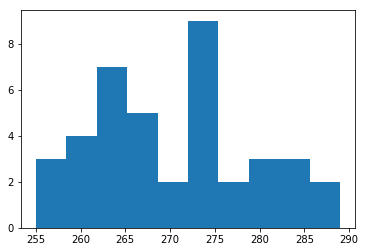

In [14]:
#Plot to view Distribution
plt.hist(a)

(array([  4.,   1.,   4.,  11.,   5.,   3.,   4.,   5.,   1.,   2.]),
 array([ 250. ,  253.9,  257.8,  261.7,  265.6,  269.5,  273.4,  277.3,
         281.2,  285.1,  289. ]),
 <a list of 10 Patch objects>)

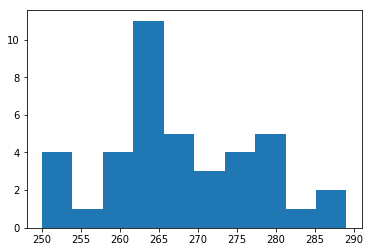

In [15]:
plt.hist(b)

{'boxes': [<matplotlib.lines.Line2D at 0x1a16e66a90>],
 'caps': [<matplotlib.lines.Line2D at 0x1a17248940>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1702f5f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1702f1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a17248080>,
  <matplotlib.lines.Line2D at 0x1a17248518>]}

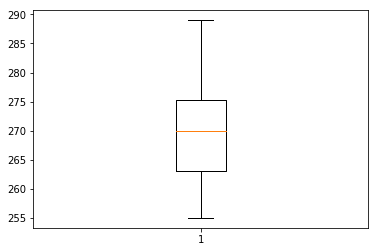

In [32]:
#Plot the boxplot

plt.boxplot(a)

{'boxes': [<matplotlib.lines.Line2D at 0x1a172d9588>],
 'caps': [<matplotlib.lines.Line2D at 0x1a172d9f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a172f8c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a172f8828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a172d96d8>,
  <matplotlib.lines.Line2D at 0x1a172d9b70>]}

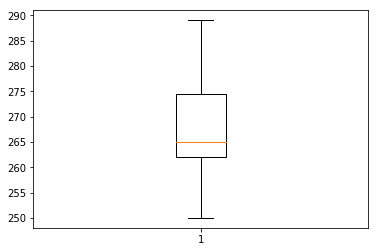

In [33]:
plt.boxplot(b)

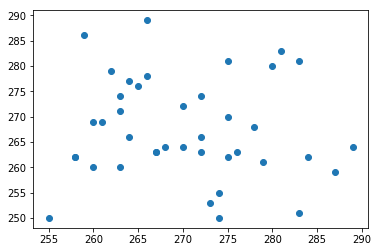

In [36]:
#Scatterplot

plt.plot(a,b,'o')

In [17]:
# Conduct the Shapiro and levene's tests for assumptions

shapiro(a)

(0.9707045555114746, 0.37878310680389404)

In [18]:
shapiro(b)

(0.9678265452384949, 0.3064688742160797)

In [20]:
levene(a,b)

LeveneResult(statistic=0.25532382917657409, pvalue=0.61477595233313087)

In [44]:
# Use scipy.stats.ttest_ind.
t, p = ttest_ind(a, b)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 1.32836  p = 0.187932


Since the p-value is greater than 0.05, w cannot reject our null hypothesis

So, Par Inc, can move the new golf balls into production

In [45]:
#Power of Test conducted to calculate the ideal sample size(n) for 2 data variables
import scipy
#We shall create a custom function to identify the need for a larger sample size value

def sample_power_difftest(d, s, power=0.8, sig=0.05):
    z = scipy.stats.norm.isf([sig/2])                   #Inverse Survival Function for calculation
    zp = -1 * scipy.stats.norm.isf([power])
    n = (2*(s**2)) * ((zp + z)**2) / (d**2)
    return int(round(n[0]))


# Given d (difference in means), 
# s (pooled standard deviation), 
# sig (significance level, typically .05), 
# power (typically .80)



In [46]:
# Let us calculate the necessary data in order to run our power test

#Firstly, calculate the means of the 2 variables Current and New
mean_current=a.mean()
mean_new=b.mean()

#Secondly, calculate the standard deviations of the 2 variables
std_current=a.std()
std_new=b.std()

In [47]:
std_current

8.7529848388845952

In [48]:
std_new

9.8969044629478944

In [49]:
#Now, let us calculate the difference in their means
d = mean_current - mean_new

#Next, we calculate the pooled Standard Deviation for the 2 variables using the following formula
s = np.sqrt(((8.753**2)+(9.897**2))/2)

In [50]:
#Now we calculate the sample size needed for a power of 0.8
n = sample_power_difftest(d,s,power=0.8,sig=0.05)

In [51]:
n

178

We can observe from above result, that in order for the hypothesis test to have a power of confidence of atleast 80%, atleast 178 observations are needed.

However, our dataset has only 40 observations, hence a larger sample size would be needed to increase the power of our Model